# Supervised RandomForest

In [8]:
import datetime
import pickle
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Read the Train/Test data

In [2]:
# Read in Test/Train Data
X_train = pd.read_parquet('final_output/X_train.parquet')
X_test = pd.read_parquet('final_output/X_test.parquet')
y_train = pd.read_parquet('final_output/y_train.parquet').values
y_test = pd.read_parquet('final_output/y_test.parquet').values

Perform the HyperParam HalvingGridSearchCV

In [3]:
start_time_reg = datetime.datetime.now()
param_grid = {
    'n_estimators': range(200, 1600, 100),
    'max_features': ['sqrt', 'log2', .1],
    'max_depth': range(10, 100, 10),
    'min_samples_split': [4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_leaf': [2, 3, 4],
    'bootstrap': [False],
    'criterion': ['absolute_error'],
    'ccp_alpha': [.001]
}

# Create the RF model and execute with cv 5
rf = RandomForestRegressor()
rf_search = HalvingGridSearchCV(rf, param_grid=param_grid, factor=3, cv=5, verbose=3, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_error')
rf_search.fit(X_train, y_train.ravel())

print('The time used for the HalvingGridSearchCV is ', datetime.datetime.now()-start_time_reg)

n_iterations: 5
n_required_iterations: 9
n_possible_iterations: 5
min_resources_: 10
max_resources_: 2143
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10206
n_resources: 10
Fitting 5 folds for each of 10206 candidates, totalling 51030 fits
----------
iter: 1
n_candidates: 3402
n_resources: 30
Fitting 5 folds for each of 3402 candidates, totalling 17010 fits
----------
iter: 2
n_candidates: 1134
n_resources: 90
Fitting 5 folds for each of 1134 candidates, totalling 5670 fits
----------
iter: 3
n_candidates: 378
n_resources: 270
Fitting 5 folds for each of 378 candidates, totalling 1890 fits
----------
iter: 4
n_candidates: 126
n_resources: 810
Fitting 5 folds for each of 126 candidates, totalling 630 fits


E:\Languages\Anaconda\envs\siads696\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The time used for the HalvingGridSearchCV is  0:43:58.484310


Take the best model and run predictions on the X_test data

In [4]:
rf_best = rf_search.best_estimator_
rf_predict = rf_best.predict(X_test)
rf_r2 = r2_score(y_test, rf_predict)
rf_mae = mean_absolute_error(y_test, rf_predict)
rf_mse = mean_squared_error(y_test, rf_predict)

In [5]:
print(f'RandomForestRegressor R^2:  {rf_r2}')
print(f'RandomForestRegressor MAE:  {rf_mae}')
print(f'RandomForestRegressor RMSE: {np.sqrt(rf_mse)}')
print(f'RandomForestRegressor Best Params: {rf_best.get_params()}')
print(f'RandomForestRegressor Feat Import: {dict(zip(rf_best.feature_names_in_, rf_best.feature_importances_))}')

RandomForestRegressor R^2:  0.7278277395643352
RandomForestRegressor MAE:  0.770392641426413
RandomForestRegressor RMSE: 1.0739387239123992
RandomForestRegressor Best Params: {'bootstrap': False, 'ccp_alpha': 0.001, 'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
RandomForestRegressor Feat Import: {'Home Value': 0.08550952393702778, 'LowIncTracts_Pct': 0.0290479454306179, 'Urban_Pct': 0.2882732001891769, 'Desert_Pct': 0.020725145774860326, 'LA1and10_Pct': 0.056768061002311146, 'LAhalfand10_Pct': 0.06326685841038188, 'LA1and20_Pct': 0.0778672611454363, 'LATracts_half_Pct': 0.1851007641291459, 'LATracts1_Pct': 0.08338578733140406, 'LATracts10_Pct': 0.025320639915700622, 'LATracts20_Pct': 0.0059295568

Take a look at a couple of the HyperParam combinations

In [6]:
param1 = 'param_n_estimators'
param2 = 'param_max_depth'
param3 = 'param_max_features'
param4 = 'param_min_samples_split'
param5 = 'param_min_samples_leaf'

rf_results = rf_search.cv_results_

scores = rf_results['mean_test_score']
param1_values = rf_results[param1]
param2_values = rf_results[param2]
param3_values = rf_results[param3].astype('str')
param4_values = rf_results[param4]
param5_values = rf_results[param5]

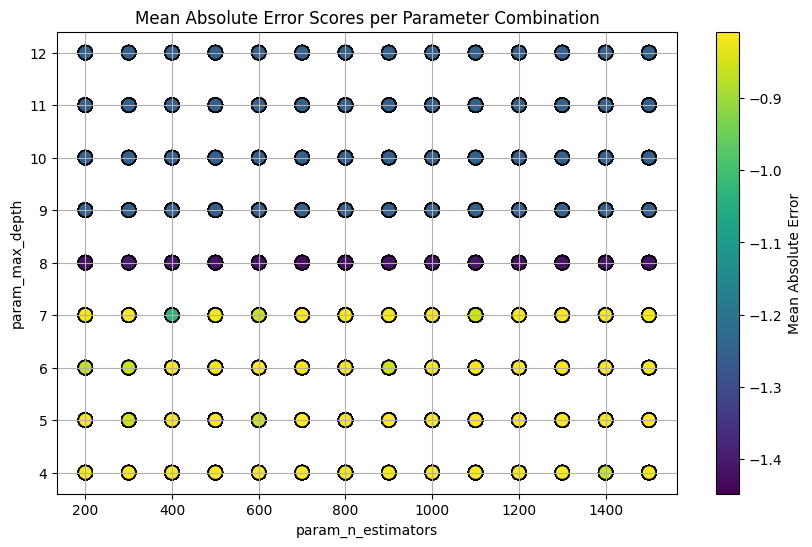

In [9]:
plt.figure(figsize=(10,6))
# Using scatter plot; color represents the MAE scores
plt.scatter(param1_values, param4_values, c=scores, cmap='viridis', s=100, edgecolors='k')
plt.colorbar(label='Mean Absolute Error')
plt.xlabel(param1)
plt.ylabel(param2)
plt.title('Mean Absolute Error Scores per Parameter Combination')
plt.grid(True)
plt.show()

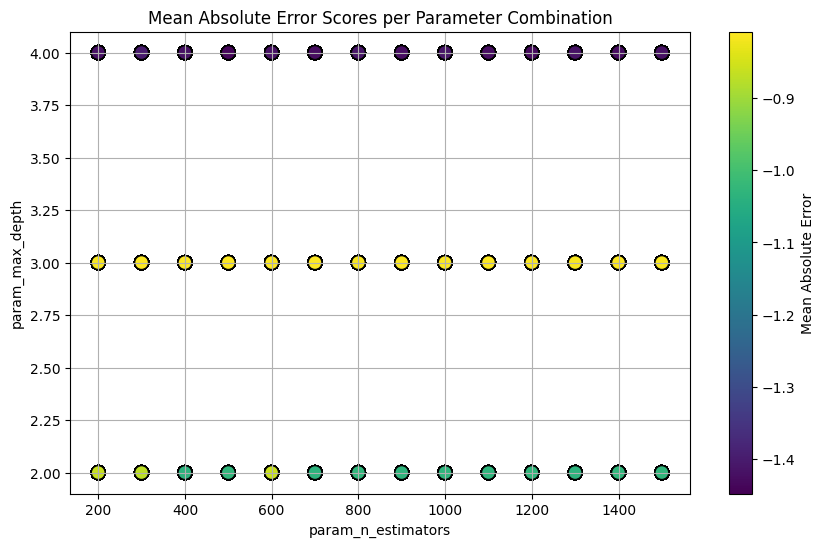

In [13]:
plt.figure(figsize=(10,6))
# Using scatter plot; color represents the MAE scores
plt.scatter(param1_values, param5_values, c=scores, cmap='viridis', s=100, edgecolors='k')
plt.colorbar(label='Mean Absolute Error')
plt.xlabel(param1)
plt.ylabel(param2)
plt.title('Mean Absolute Error Scores per Parameter Combination')
plt.grid(True)
plt.show()

In [17]:
# Write out the RandomForest Search object and Model
with open('final_output/rf_search.pkl', 'wb') as f:  # All Grid Search Models
  pickle.dump(rf_search, f)
with open('final_model/rf_model.pkl', 'wb') as f:  # Best Halving Grid Search Model
  pickle.dump(rf_best, f)

In [18]:
bi = rf_search.best_index_
print(f"Std Score: {-rf_search.cv_results_['mean_test_score'][bi]:.4f}")
print(f"Std Score: {rf_search.cv_results_['std_test_score'][bi]:.4f}")

Std Score: 0.8082
Std Score: 0.0597


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e75edf0e-32f1-42b8-8a27-9dc0078a206d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>